<h4>This exercise is a continuation of using my chosen dataset for the the Feature Engineering. Here I use some tools for the 
Optimal Variable Selection</h4>

In [5]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [9]:
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("white_wine_cleaned.csv")

# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5


In [11]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

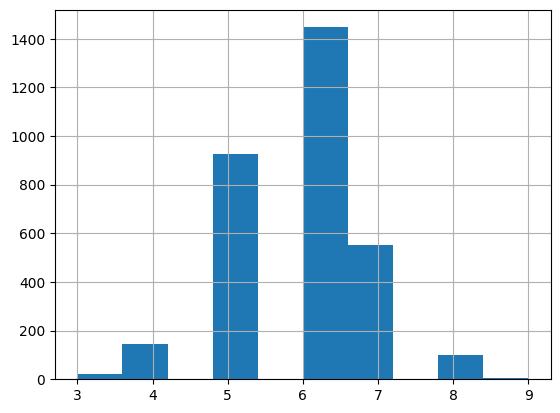

In [ ]:
# this shows the histogram of 
# targeted variable "quality"
# the histogram plot shows that
# the 'quality' 6 is most represented
# follow by 5 and then 7
df["quality"].hist()

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df['quality']

<Axes: >

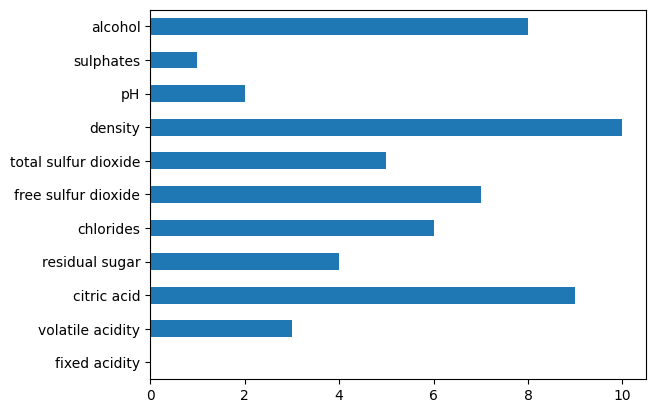

In [ ]:
# I install 'pip install skfeature-chappers'
# sulphates is the lowest and 
# follow by pH, 
# fixed acidity is absolutely not existed 
# interestingly, the 'density' is the highest
# next by citric acid
# the variable 'alcohol' is quite high too
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

In [16]:
# the SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
6,total sulfur dioxide,2757.15
5,free sulfur dioxide,830.32
3,residual sugar,439.85
10,alcohol,114.43
1,volatile acidity,42.60
7,density,18.26
0,fixed acidity,8.51
2,citric acid,4.83
9,sulphates,2.41
8,pH,0.47


<h4>The SelectKBest Test </h4>
<ul>
<li>I used the SelectKBest which is a variable/feature selector </li>
<li>(feature selection method)</li>
<li>helps select the highly important variables which is related</li>
<li>according to how their scoring features function. </li>
<li>Also, it showed the scores in descending form of order. </li>
<li>and the higher the feature score the highly important the feature is,</li>
<li>The information given by the outcome showed</li>
<li>that the features that has higher scores </li>
<li>i.e total sulfur dioxide, followed by free sulfur dioxide, </li>
<li>residual sugar, density etc.</li>
<li>I believe this shows that </li>
<li>features with the higher scores</li>
<li>are very much key factor when it comes to the training the model </li>
<li>predicting the target variable which is the quality of the wine. </li>
<li>Also it can be seen that the quality (feature) had </li>
<li>somehow high score that showed it is of high importance too.</li>
<li>The feature Chlorides has a NaN score, </li>
<li>which I believe it is either a missing value or </li>
<li>perhaps, its an invalid data for the feature.</li>
</ul>

<h4>The Chi-squared Test</h4>
<ul> <li>  
<li>The chi-squared test showed the statistical test</li>
<li>which reveal the key factor or connection</li> 
<li>between the category variables.</li> 
<li>The test shows the frequencies of the category variables </li>
<li>and compared it to the expected frequency independently in this case . </li>
<li>Then indicated by measuring the dependency</li> 
<li>between each feature and the target variable</li> 
<li>which in this the 'quality' of the wine.</li> 
<li>And, the higher chi-squared scores reveal there is</li> 
<li>more correlations between the features (variables) and the targeted variable.</li>
</ul>